In [2]:
import pandas as pd

In [3]:
#1 Load data and explore
df = pd.read_csv("adidas.csv")

In [5]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$6,00,000","$3,00,000",50%,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$5,00,000","$1,50,000",30%,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$4,00,000","$1,40,000",35%,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$3,82,500","$1,33,875",35%,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$5,40,000","$1,62,000",30%,In-store


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


In [ ]:
#Converting the date column and clean numeric columns:

In [7]:
# Convert Invoice Date to datetime format (with dayfirst=True)
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], dayfirst=True)


In [9]:
#checking for missing values
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [10]:
#Let’s check overall data
df.describe()

,Retailer ID,Invoice Date
count,9.648000e+03,9648
mean,1.173850e+06,2021-05-10 15:20:44.776119296
min,1.128299e+06,2020-01-01 00:00:00
25%,1.185732e+06,2021-02-17 00:00:00
50%,1.185732e+06,2021-06-04 00:00:00
75%,1.185732e+06,2021-09-16 00:00:00
max,1.197831e+06,2021-12-31 00:00:00
std,2.636038e+04,NaN


In [12]:
df.nunique()

Retailer               6
Retailer ID            4
Invoice Date         724
Region                 5
State                 50
City                  52
Product                6
Price per Unit        94
Units Sold           361
Total Sales         3138
Operating Profit    4187
Operating Margin      66
Sales Method           3
dtype: int64

In [17]:
# Remove $ and commas from numeric columns
cols_to_clean = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']
for col in cols_to_clean:
    df[col] = df[col].replace('[\$,%,]', '', regex=True).str.replace(',', '').astype(float)


In [19]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Year,Month_Num
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,2020-01,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,2020-01,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store,2020-01,2020,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store,2020-01,2020,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store,2020-01,2020,1


C:\Users\Khushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Khushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


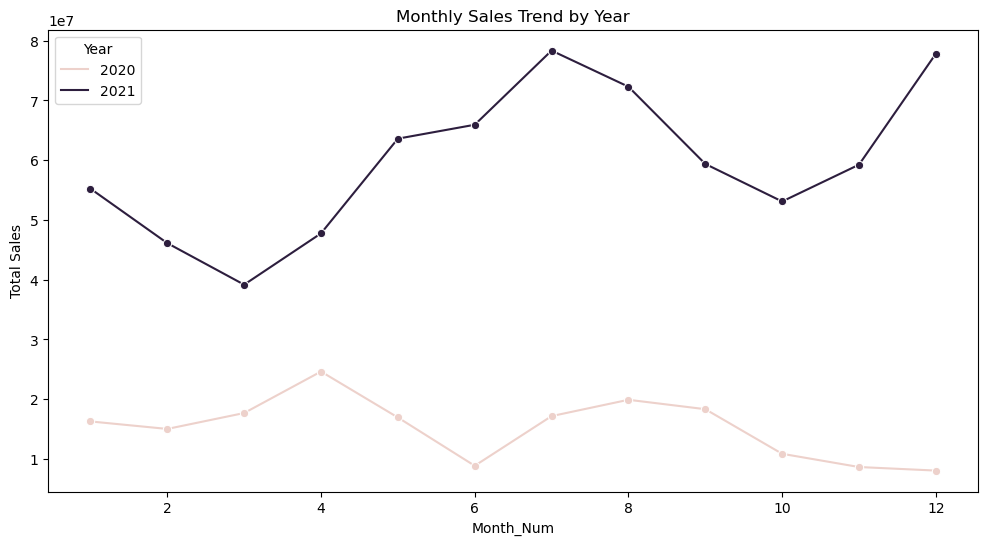

In [20]:
#Total Sales and Profit by Year and Month
sales_trend = df.groupby(['Year', 'Month_Num'])[['Total Sales', 'Operating Profit']].sum().reset_index()

# Plot the trend
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='Month_Num', y='Total Sales', hue='Year', marker='o')
plt.title('Monthly Sales Trend by Year')
plt.show()


In [23]:
# Convert 'Invoice Date' to datetime format (if not already done)
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Set 'Invoice Date' as the index
df.set_index('Invoice Date', inplace=True)

# Sort the data by date (important for time series models)
df = df.sort_index()

# Aggregate sales by month
monthly_sales = df['Total Sales'].resample('M').sum()


 set_index('Invoice Date') sets the date column as the index — required for time series models.
 sort_index() ensures the data is in chronological order.
 resample('M') groups data by month.
 sum() calculates the total sales for each month.

In [24]:
monthly_sales.head()


Invoice Date
2020-01-31    16253746.0
2020-02-29    14997988.0
2020-03-31    17660577.0
2020-04-30    24607006.0
2020-05-31    16918014.0
Freq: M, Name: Total Sales, dtype: float64

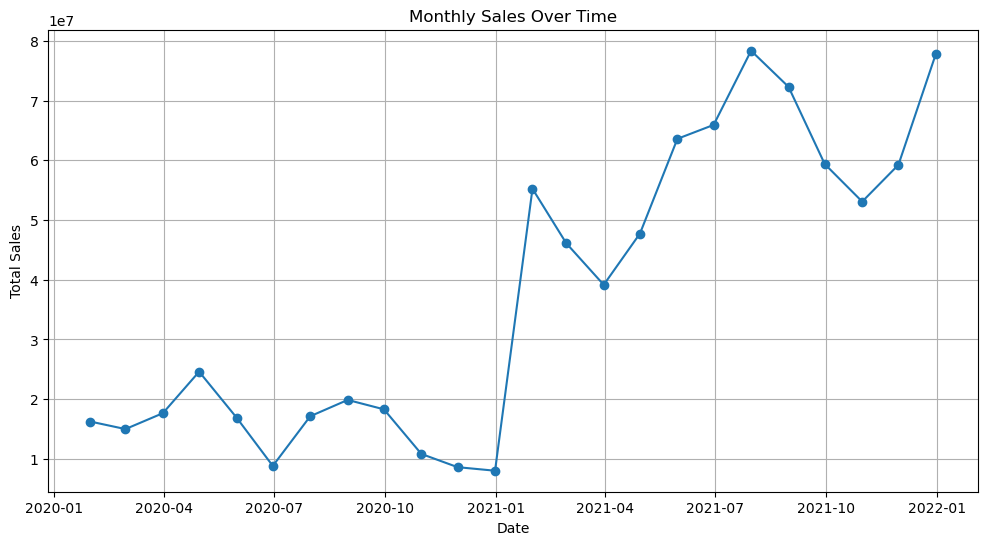

In [25]:
#Let's plot the data to spot trends and seasonality.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o', linestyle='-')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


In [26]:
#Building an ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

# Create ARIMA model (p = 1, d = 1, q = 1)
model = ARIMA(monthly_sales, order=(1, 1, 1))
model_fit = model.fit()


(p, d, q) are ARIMA parameters:

p = 1 → Past values used in prediction
d = 1 → Differencing applied to make the data stationary
q = 1 → Past errors used in prediction

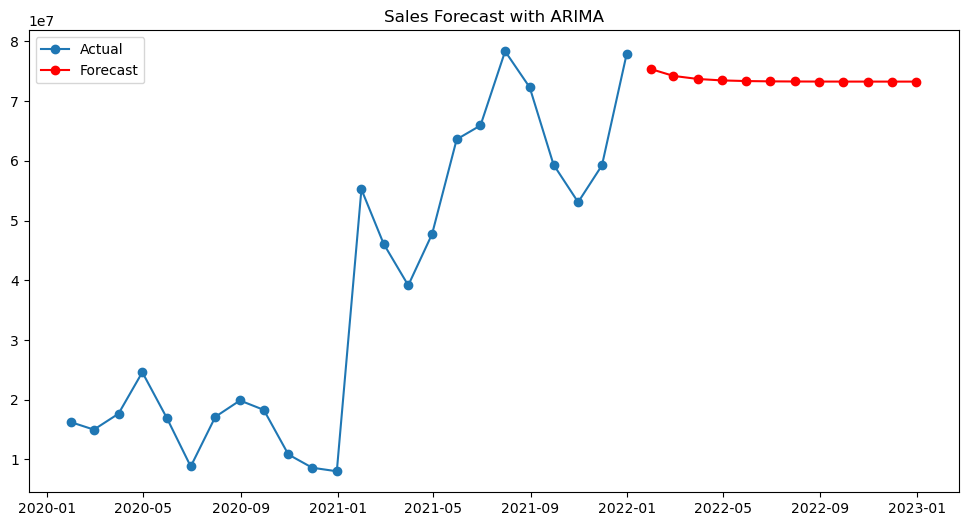

In [27]:
#Let's predict sales for the next 12 months:
forecast = model_fit.get_forecast(steps=12)
forecast_index = forecast.predicted_mean.index
forecast_values = forecast.predicted_mean

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Actual', marker='o')
plt.plot(forecast_index, forecast_values, label='Forecast', marker='o', color='red')
plt.title('Sales Forecast with ARIMA')
plt.legend()
plt.show()


In [28]:
#We'll calculate MAE and RMSE to measure model accuracy:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Get actual vs predicted values for the test period
y_test = monthly_sales[-12:]
y_pred = forecast_values

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


MAE: 15362383.20
RMSE: 18359046.05


The data has strong seasonality that ARIMA isn’t fully handling.
The data is too volatile, leading to high variance.
